###  Hello 👋 Welcome !!! 

### This notebook serves as a mini version of the 4 part [Yelp data analysis](https://vaddina.github.io/yelp-data-analysis-part-I.html) blog post series and gives you a short presentation of the interesting insights we derived thereof. Please head over to the blog for more details. The code is available here. 

Here, we conduct data exploration & analysis of [Yelp data](https://www.yelp.com/dataset_challenge) and the goal is to frame a few interesting questions and try to find the answers using the data.

[Yelp](https://www.yelp.com/) is a website which `publishes crowd-sourced public reviews`. In other words, it offers a service where people can review many types of businesses like `restaurants, bars, automotive related etc.`. 

The dataset acts as a rich source of information on users & businesses and helps us to find out many interesting topics like evolving food trends, best food by region, cheap & best beauty parlours nearby etc. The users' data can also be used as a social graph to find interesting connections amongst users based on their interests, friend circles and so on. Many [research articles](https://scholar.google.com/scholar?q=citation%3A+Yelp+Dataset) have made use of this evolving data to derive interesting insights. Though many have concentrated on `Reviews, Businesses & Users'` data, there are only few papers that made use of `Tips`. Here among other things, we shall explore its relation to other datasets and its importance.

We ask the following questions:

1. How did generosity change over time? How does it compare by reviews' growth ?
  * How does it vary by region / sex ?
2. Is there any relationship between the reviews and tips left by any given user?
  * Is it different when looked from a business' perspective ?
3. How did gender diversity change over time?
  * How is it related to the contribution of reviews & tips?
4. Predict the rating given by a user just from his/her review.
  * In other words, perform a fine grained sentiment classification.

`NOTE: The internals of the code is not much explained here as this intends to give a concise view of what we explored and how we did it. You can head over to the blog post for in-detail explanation of why we are doing what we are doing. Or you can select the 'open' option under 'file' menu above and inspect the code yourself.`

Before we proceed further, let's load data analysis and visualization libraries

In [1]:
import pandas as pd
np = pd.np

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

from bokeh.plotting import figure, show, output_notebook #, output_file
from bokeh.charts import Area, defaults
from bokeh.layouts import row, gridplot, column
from bokeh.models import Range1d

Output the plots to notebook for `inline` visualization

In [3]:
output_notebook()

Loading BokehJS ...

Load the Yelp Data set, clean it and keep it ready

In [4]:
from yelp_analysis import Yelp

yp = Yelp(data_folder='./data/')
yp.preProcess_data(names_folder='./data/names')

The above code reads the datasets with `spark` (although not all into memory), cleans the text, assigns genders to users, corrects data formats (e.g., 'string' to 'dates' / 'integers') etc.

Note that the original `users` dataset has no `gender` attribute. They contain only `first name` of the users. Hence we download the [dataset](https://www.ssa.gov/oact/babynames/names.zip) containing all the babynames of US citizens since 1880 maintained by US govt. and infer genders based on that data.

After inferring gender for all `686,556` unique users in our dataset, we have identified the gender of `(333658 + 291805) / 686556 =` __91.1%__ of the people. Overall we have **48.6% _female_** population and **42.5% _male_** population and `8.9%` of unknown gender.

We assign the labels "_0, 1, 2_" to "_female, male & unknown_" genders respectively.

<h2> Task I - Reviews and Tips growth by Gender & Region </h2>

In this we will find out how actively people *__tip__*. They are generous in the sense that they not only provide a review but go the extra mile to leave small TL;DR messages for businesses. We shall also see the monthly contribution activity of __Reviews__ as well. Before we filter this data based on `Region` & `Gender`, let's find out how this rate varied throughout these years.

For this, we do the following:

1. Convert all the date of entries of reviews & tips to `end-of-months` format (i.e., 2013-12-15 => 2013-12-31)
2. Group the data based on this `end-of-month` attriubute and aggregate the counts for each month in each year.
3. Plot the result

In [9]:
# # Get the growth rates of tips & reviews.
# # WARNING:  this will take some time...

tg = yp.get_overall_growth_rate('tips')
rg = yp.get_overall_growth_rate('reviews')

Plot the overall growth rates of tips & reviews

In [10]:
# rename the columns for plotting convenience
rg.columns = ['dt', 'reviews']
tg.columns = ['dt', 'tips']

# set the datetime as Index
tg.set_index('dt', inplace=True)
rg.set_index('dt', inplace=True)

df = yp.ut.align_timeseries_data(dfs=[tg, rg])

defaults.width = 1000
defaults.height = 450

area = Area(df.reset_index(), x='months', y=['reviews', 'tips'], xlabel='years', color=['orange', 'green'],
            ylabel='no. of tips / reviews given per month', title='Monthly growth of Tips & Reviews')

# output_file('reviews_tips_monthly_growth.html')
show(area)

We observe that the _tipping_ trend had hit its peak somewhere in mid-2013 and continued to drop over all throughout the years. So less people are generous these days. 😥

Reviewers on the other hand register a healthy growth throughout the years and are far high in number compared to the tipsters. 💃

### 1b. Get growth rates by region, gender & source

Here, we shall see the monthly contribution to `Reviews` & `Tips` filtered by __`Region & Gender`__.

The dataset has data from 4 locations (__USA, UK, CANADA, Germany (DEUTSCHLAND)__) although most of the data is from the _US_.

Now that we have __gender__ attribute, it is more interesting to see how each gender contributes to tips & reviews and more interestingly enough how does this vary by region.

For that we do the following:
1. Get businesses based on region ('USA', 'UK', 'CAN', 'DEU')
2. For each region:
  * find out the `user_id`s of the reviewers that reviewed their businesses
  * take only those for whom we know the gender for sure (i.e., `gender != 2`)
  * now get the dates on which these users have reviewed
  * group the data based on months and aggregate the counts.
3. Normalize the monthly counts to see the effect of each region and plot them.

In [11]:
# WARNING : Getting these results take some time on a single machine

mtg_usa, ftg_usa = yp.get_growth_rate(country='USA', byGender=True, source='tips')
mtg_uk,  ftg_uk  = yp.get_growth_rate(country='UK',  byGender=True, source='tips')
mtg_can, ftg_can = yp.get_growth_rate(country='CAN', byGender=True, source='tips')
mtg_deu, ftg_deu = yp.get_growth_rate(country='DEU', byGender=True, source='tips')



 obtaining growth rates for the country USA


obtaining local business ids
obtaining local business users
getting male & female local users
getting male & female reviewing/tipping dates
getting male date counts
getting female date counts
normalizing the counts...
converting to datetime...
returning male & female date growth counts


 obtaining growth rates for the country UK


obtaining local business ids
obtaining local business users
getting male & female local users
getting male & female reviewing/tipping dates
getting male date counts
getting female date counts
normalizing the counts...
converting to datetime...
returning male & female date growth counts


 obtaining growth rates for the country CAN


obtaining local business ids
obtaining local business users
getting male & female local users
getting male & female reviewing/tipping dates
getting male date counts
getting female date counts
normalizing the counts...
converting to datetime...
returning male & female date growth cou

In [14]:
dfs = [mtg_usa, ftg_usa, mtg_uk, ftg_uk, mtg_can, ftg_can, mtg_deu, ftg_deu]
df = yp.ut.align_timeseries_data(dfs).reset_index()

# let's rename the columns properly for ease of identification after plotting
df.columns = ['months', 'male_USA', 'female_USA', 'male_UK', 'female_UK', 'male_CAN', 'female_CAN',
              'male_DEU', 'female_DEU']

df.set_index('months', inplace=True)

defaults.width = 500
defaults.height = 400

area_usa = Area(df.reset_index(), x='months', y=['male_USA', 'female_USA'], xlabel='years', title='USA',
                ylabel='no. of tips given (norm)',)
area_uk = Area(df.reset_index(), x='months', y=['male_UK', 'female_UK'], xlabel='years', title='UK',
                ylabel='no. of tips given (norm)',)
area_can = Area(df.reset_index(), x='months', y=['male_CAN', 'female_CAN'], xlabel='years', title='CANADA',
                ylabel='no. of tips given (norm)', )
area_deu = Area(df.reset_index(), x='months', y=['male_DEU', 'female_DEU'], xlabel='years',
                title='DEUTSCHLAND', ylabel='no. of tips given (norm)', background_fill_color='yellow',
                background_fill_alpha=0.2)

area_usa.y_range = Range1d(0, 0.05)
area_uk.y_range = Range1d(0, 0.05)
area_can.y_range = Range1d(0, 0.05)
area_deu.y_range = Range1d(0, 0.15)

show(gridplot([[area_usa, area_uk], [area_can, area_deu]]))

Lots of insights can be gathered from the above data. First of all, the Germany (Deutschland) table is highlighted because of the Y-Axis scale which is _very large_ compared to the rest of the three. Now all the other three countries' data has same scale for easier comparison. Since most of the data is from the US, the counts are _normalized_ to observe the individual contributions from a region at the same scale. Finally, We observe the following:

* Males in the USA, Canada initially started out high but eventually overtaken by females in terms of contribution of tips per month. But the former sort of maintain equal or dominant position overall in the UK & Germany.
* Most of the peaks are in the midst of years indicating that the activity is high when the weather is pleasant, like during Summer.
* The lowest activity is detected just before the end of 2015 in all the regions.
* Except for Germans, Canadians are the only ones showing an increasing trend compared to USA, UK where we can observe a decline in the contribution rate (except for occasional peaks).
* Region wise, Germans' contributions are very high compared to the rest i.e., a typical german _yelper_ is far more likely to leave a tip than yelpers in the other three countries. But unfortunately, we have very less data in this region to draw any meaningful conclusions.


Let's find out what __reviews__ has to offer 😉

In [ ]:
# WARNING: Computing this takes some time on a single machine.


mrg_usa, frg_usa = yp.get_growth_rate(country='USA', byGender=True, source='reviews')
mrg_uk,  frg_uk  = yp.get_growth_rate(country='UK',  byGender=True, source='reviews')
mrg_can, frg_can = yp.get_growth_rate(country='CAN', byGender=True, source='reviews')
mrg_deu, frg_deu = yp.get_growth_rate(country='DEU', byGender=True, source='reviews')

In [17]:
dfs = [mrg_usa, frg_usa, mrg_uk, frg_uk, mrg_can, frg_can, mrg_deu, frg_deu]
df = yp.ut.align_timeseries_data(dfs).reset_index()

# let's rename the columns properly for ease of identification after plotting
df.columns = ['months', 'male_USA', 'female_USA', 'male_UK', 'female_UK', 'male_CAN', 'female_CAN',
              'male_DEU', 'female_DEU']

df.set_index('months', inplace=True)

defaults.width = 500
defaults.height = 400

area_usa = Area(df.reset_index(), x='months', y=['male_USA', 'female_USA'], xlabel='years', title='USA',
                ylabel='no. of reviews given (norm)',)
area_uk = Area(df.reset_index(), x='months', y=['male_UK', 'female_UK'], xlabel='years', title='UK',
                ylabel='no. of reviews given (norm)', background_fill_color='yellow', background_fill_alpha=0.2)
area_can = Area(df.reset_index(), x='months', y=['male_CAN', 'female_CAN'], xlabel='years', title='CANADA',
                ylabel='no. of reviews given (norm)', )
area_deu = Area(df.reset_index(), x='months', y=['male_DEU', 'female_DEU'], xlabel='years',
                title='DEUTSCHLAND', ylabel='no. of reviews given (norm)')

area_usa.y_range = Range1d(0, 0.03)
area_uk.y_range = Range1d(0, 0.07)
area_can.y_range = Range1d(0, 0.03)
area_deu.y_range = Range1d(0, 0.03)

show(gridplot([[area_usa, area_uk], [area_can, area_deu]]))

Following the same procedure as above for deriving the data, we see the following:

* All the regions show a growing trend in reviewing.
* Again, females are taking over males in all the regions.
* Canadians and Americans are active in reviewing than Brits.
* We also see an unusually sharp spike somewhere in mid 2011 for UK region. [Elections](https://en.wikipedia.org/wiki/2011_in_the_United_Kingdom) could be one possible cause.


<h2> Task II - Word Counts and Word Clouds of Tips & Reviews</h2>

Here we find out whether:

* __Is there any relationship between the reviews and tips left by any given user?__
  * __Is it different when looked from a business’ perspective ?__

This is to see if there is any pattern in a way a given user writes his/her review & a tip. Thus, we are looking for those who have reviewed & tipped at least once and we want to see their behaviour roughly.

The length of text varies amongst users and some prefer short texts while some go full Sherlock 👓🔍. And this behavior could possibly be seen in reviews/tips. Here's how we do it:

1. Get word counts for all the tips & reviews
2. Get only those users who have reviewed _AND_ tipped at least once.
3. Group the data based on user_id
4. Get the average word count for every user for his/her reviews & tips


In [18]:
uni_user_tips = yp.tips.select('user_id').distinct()           # select distinct users in tips
user_tip_wc = yp.tips.groupBy('user_id')\                      # group 'tips' by user_id
                      .agg({'wordCount':'mean'})\               # get avg word count for all of his/her tips
                      .withColumnRenamed('avg(wordCount)', 'avg_tip_wc')  # rename the column

user_rev_wc = yp.reviews.join(uni_user_tips, 'user_id')\       # join the above table with this for common users
                         .groupBy('user_id')\                   # group by user_id
                         .agg({'wordCount':'mean'})\            # get avg word count for all his/her reviews
                         .withColumnRenamed('avg(wordCount)', 'avg_rev_wc')  # rename the column

# join both the above tables
rv_tips_users = user_rev_wc.join(user_tip_wc, 'user_id')\
                           .select('avg_rev_wc', 'avg_tip_wc')\
                           .toPandas()


In [19]:
x, y = rv_tips_users.avg_rev_wc, rv_tips_users.avg_tip_wc

p = figure(plot_width=800, plot_height=650, title='TIPS vs. REVIEWS word counts by USER')
p.scatter(x, y, fill_alpha=0.6, line_color=None)

p.xaxis.axis_label = 'avg. word count of REVIEWS'
p.yaxis.axis_label = 'avg. word count of TIPS'

show(p)

From this __L__ shaped curve, we can make out that:

1. The maximum average word count of reviews is `10 times` more than that of tips.
2. A vast majority of users write reviews within less than 300 words and less than 30 words for tips.
3. Interestingly those who write the longest of tips tend to review in less words and a bit vice versa.

In [20]:
uni_biz_tips = yp.tips.select('business_id').distinct()
biz_tip_wc = yp.tips.groupBy('business_id')\
                     .agg({'wordCount': 'mean'})\
                     .withColumnRenamed('avg(wordCount)', 'avg_tip_wc')

biz_rev_wc = yp.reviews.join(biz_tip_wc, 'business_id')\
                        .groupBy('business_id')\
                        .agg({'wordCount': 'mean'})\
                        .withColumnRenamed('avg(wordCount)', 'avg_rev_wc')

rv_tips_biz = biz_rev_wc.join(biz_tip_wc, 'business_id')\
                        .select('avg_rev_wc', 'avg_tip_wc')\
                        .toPandas()

In [21]:
x, y = rv_tips_biz.avg_rev_wc, rv_tips_biz.avg_tip_wc

p = figure(plot_width=800, plot_height=650, title='TIPS vs. REVIEWS word counts by BUSINESS')
p.scatter(x, y, fill_alpha=0.6, line_color=None)

p.xaxis.axis_label = 'avg. word count of REVIEWS'
p.yaxis.axis_label = 'avg. word count of TIPS'

show(p)

Doing the same operation but this time from a business' perspective offers somewhat similar pattern as before but this time, more tightly clustered.

We can observe that most businesses got reviewed within less than 200 words.

Also those businesses that have received the longest tips got small to average length reviews.

<h3> WordCloud </h3>

We can plot word clouds based on the most frequently used ones in Reviews / Tips. We can also filter by `Gender`/`region` if interested.

We can see one such example below. More examples [here](https://vaddina.github.io/2016/12/18/Yelp-Dataset-Analysis-II.html#frequent-words).

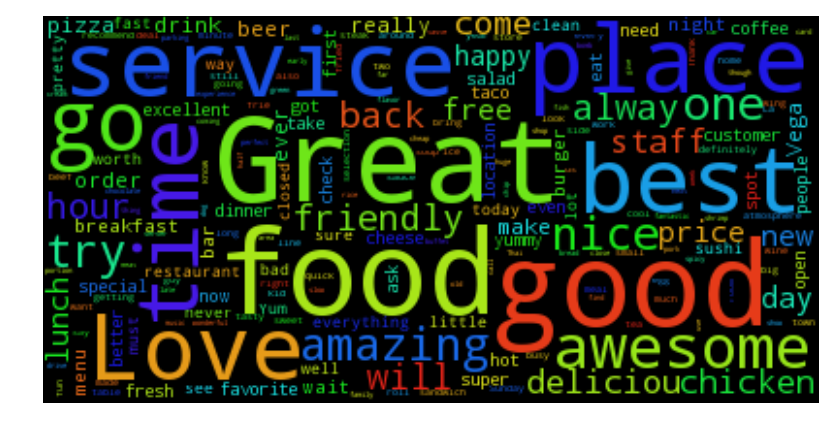

In [22]:
yp.plot_wordCloud(yp.tips, 'text')

<h2> Task III - gender diversity </h2>

`Gender Diversity` is an important property everywhere... not only for population statistics but even for businesses to attract customers.

There are few incentives for finding this:

* Businesses can take advantage of this diversity by offering gender biased services
    * E.g., a business may try to bring in more cosmetics for males if it sees an increase in their visitings

* On the other hand, some can also overcome shortcomings to attract males & females equally to reduce the diversity gap.
    * E.g, a clothing store can introduce offers when it sees a drop in female visitors / users of their brand.

Here we'll see the user growth based on gender over the years and how it is related to the the number of tips / reviews logged in Yelp every month.

We try to answer the following:
* __How did gender diversity change over time ?__
    * __what is its affect on reviewing & tipping?__

For that, we:
1. Convert the `yelping_since` attribute to _datetime_
2. Group the data based on `yelping_since` and `gender`
3. Aggregate based on counts

In [23]:
# **** WARNING *** This takes around 4 to 5 minutes on a quad core intel i7 laptop

gc = yp.get_gender_counts('users')

plt_width, plt_height = 800, 500
p1 = figure(x_axis_type='datetime', title='user growth over the years',
            plot_width=plt_width, plot_height=plt_height)

p1.xaxis.axis_label = 'years'
p1.yaxis.axis_label = 'males / females joining per month'

p1.y_range = Range1d(0, 6500)

p1.line(gc.date, gc.male_count, legend='male', color='red')
p1.line(gc.date, gc.female_count, legend='female', color='green')

show(p1)

We see that the growth pattern is identical for both sexes and has hit its peak somewhere in [early/mid 2015](http://streetfightmag.com/2015/02/05/ceo-says-yelp-is-at-peak-desktop-is-it-also-nearing-peak-growth/) and started dropping ever since to pre-2011 times.

The rate of male users registering per month was initially high until it was taken over by females from `2011` and maintained their dominance from then on.

Let us find out their individual monthly contributions.

In [24]:
# **** WARNING *** This will take some time if you run it on a laptop
tc = yp.get_gender_counts('tips', 'month')
rc = yp.get_gender_counts('reviews', 'month')

# normalize the counts
rc.male_count /= rc.male_count.sum()
rc.female_count /= rc.female_count.sum()
tc.male_count /= tc.male_count.sum()
tc.female_count /= tc.female_count.sum()

plt_width, plt_height = 800, 500
p1 = figure(x_axis_type='datetime', title=' Reviews & Tips in the form of female-male ratio over the years',
            plot_width=plt_width, plot_height=plt_height)

p1.xaxis.axis_label = 'years'
p1.yaxis.axis_label = 'ratio of tips / reviews entered per month'

p1.line(rc.date, rc.female_count / rc.male_count, legend='reviews', color='green')
p1.line(tc.date, tc.female_count / tc.male_count, legend='tips', color='red')

show(p1)

The female to male ratio for both _tips_ & _reviews_ indicates how actively those genders are contributing every month. A ratio of __< 1__ indicates _male domination_ and __> 1__ indicates _female dominance_. 

* We observe that the ratio for reviews fluctuated during the starting years and started flattening out near __1__ indicating equal contribution until around 2015 after which more females are actively reviewing than their male counterparts.

* The same can be said for `tips` which initially started out with more male contribution but females becoming more active on the scene just after 2012.

* It can also be observed that the tips rate shows a more increasing trend than reviews.

* This gives a overall sense that females are more active on yelp in terms of both reviewing & tipping. However, the rate at which they do this vary significantly from what we see from the reviews & tips' growth rate in Task 1.

__However, it is important to understand that this data is not representative of all the people but rather a small subset which may or may not be properly sampled. Yelp is constantly expanding to many regions and across businesses and the validity of the results we obtained apply only on the data we have analyzed but not of the whole Yelp user base, in general__.

<h2> Task IV - Text Classification </h2>

For the final task, we develop a text classifier to guess the rating of the review just from the text. We do a `5 level` fine grained multi-classification using shallow layered __Convolutional Neural Networks__.

Now, as we know, there have been significant technical advancements in the fields of Artifical Intelligence in the recent years and deep learning (or neural networks in general) offered us a new way of looking at things. Of these, Convolutional Neural Networks vastly improved state-of-the-art Computer Vision, Image recognition and Speech systems. They were also proven successful for text classification in the recent years.

In this task, we use a shallow layered CNN to perform a fine grained sentiment classification. These have [proven](https://arxiv.org/abs/1408.5882) to be as effective as deep layered ones for sentiment classificaion tasks albeit with much less computational overhead and complexity.

As features to this model, we shall use [Glove](http://nlp.stanford.edu/projects/glove/) word embeddings simply because it is as good as Word2Vec (if not better) but also provides smaller dimensional embeddings (to work on my laptop). However, the code accepts any type of word embeddings such as Google's [Word2Vec](https://code.google.com/archive/p/word2vec/) or Faceook's [FastText](https://github.com/facebookresearch/fastText) etc. You can also train your own Word2Vec Embeddings from yelp reviews. (see 'text_classification.py')

The architecture is similar to the [paper](https://arxiv.org/abs/1408.5882) mentioned above which is also partly related to my [thesis work](https://github.com/vaddina/cnn-text-classification-tf). 😊 See more about it's inner workings [here](https://vaddina.github.io/2016/12/18/Yelp-Dataset-Analysis-IV.html).


In [1]:
from text_classification import TextClassification

Using TensorFlow backend.


In [2]:
# Initialize it
tc = TextClassification()

# Load the data  (adjust the sample size for testing...)
# tc.load_data(training_samples=1000, validation_samples=200, testing_samples=100)

# My laptop barely survived with 100,000 examples when run locally.
# So you might want to set it to lesser value if you don't have much RAM when run in a container.
# Feel free to change it here if you have more otherwise.
tc.load_data(training_samples=100000, validation_samples=20000, testing_samples=10000)


_ = tc.build_network()

holy_grail obtained...
loading embeddings...


In [3]:
tc.train(num_epochs=3, batch_size=500)

/Users/Vivek/anaconda/envs/dataScience/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:91: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 93825 samples, validate on 20000 samples
Epoch 1/3
93825/93825 [==============================] - 1923s - loss: 4.8303 - categorical_accuracy: 0.3704 - val_loss: 1.1511 - val_categorical_accuracy: 0.4997

In [6]:
# test it on the heldout dataset ('tc.x_test')

tc.test()

categorical_accuracy: 0.6511
confusion_matrix:
 [[ 982  178   48   24   42]
 [ 214  272  233   83   27]
 [  63  139  455  444   83]
 [  25   34  215 1371  779]
 [  25   12   38  783 3431]]


That's all there is to it. 😅  Hope you have enjoyed and taken a point or two from here. Follow the [blog posts](https://vaddina.github.io/2016/12/18/Yelp-Dataset-Analysis-I.html) if you want to know more about these. If you find any mistakes please kindly report by [email](mailto:kevad@protonmail.com). 